In [16]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS
import matplotlib.pyplot as plt
import math
import joblib

In [2]:
df=pd.read_parquet('cleaned_data/track_features.parquet')

In [3]:

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)


In [7]:

# Split the data into training and testing sets
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)
X_train.shape


(2965110, 30)

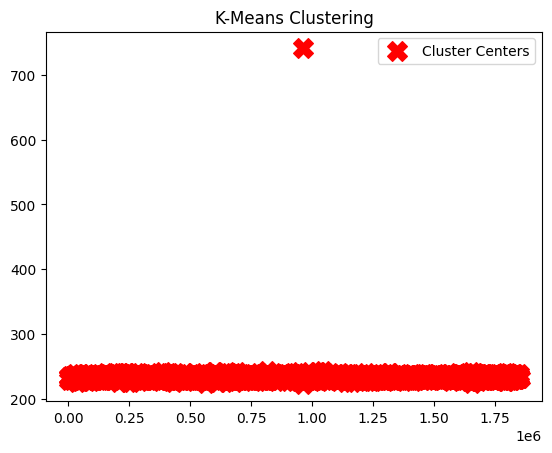

In [14]:
# Choose the number of clusters (K)
k=math.sqrt(X_train.shape[0])
k=int(k)

# Instantiate the KMeans model
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the model to the data
kmeans.fit(X_train)

# Get the cluster labels and cluster centers
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Visualize the clusters
# plt.scatter(X_train[:, ], X_train[:, 1], c=labels, cmap='viridis', s=50, alpha=0.8)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.title('K-Means Clustering')
plt.legend()
plt.show()


In [17]:
joblib.dump(kmeans, 'Kmeans_clustertin.joblib')

['Kmeans_clustertin.joblib']

In [16]:
# Find the optimal number of clusters using the elbow method
inertia = []
for k in range(2, 2000):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

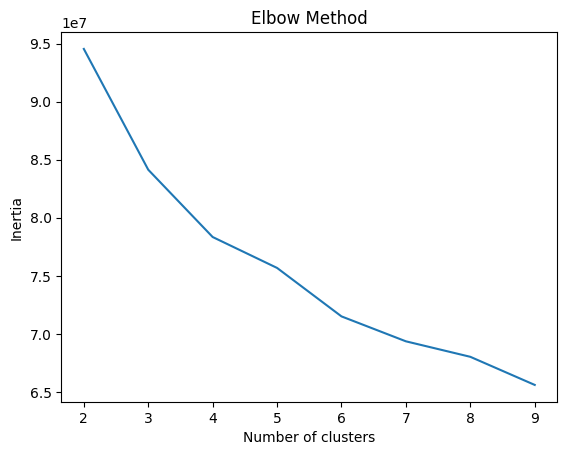

In [17]:
plt.plot(range(2, 2000), inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [ ]:
# Choose the optimal number of clusters and perform k-means clustering
k = int(input("Enter the number of clusters: "))
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(scaled_features)

In [ ]:

# Add cluster labels to the dataset
features['Cluster'] = clusters


In [ ]:
# Output the results
print(data)


In [ ]:
# Calculate the Davies-Bouldin index to measure the quality of the clustering
db_index = davies_bouldin_score(scaled_features, clusters)
print("The Davies-Bouldin index is:", db_index)


In [ ]:
# Calculate the Calinski-Harabasz index to measure the quality of the clustering
ch_index = calinski_harabasz_score(scaled_features, clusters)
print("The Calinski-Harabasz index is:", ch_index)

In [ ]:


# Calculate the silhouette score to measure the quality of the clustering
silhouette_avg = silhouette_score(scaled_features,clusters)
print("The average silhouette score is:", silhouette_avg)

features.to_csv(R"C:\Users\Namra\Desktop\AI_Data\clustered_data1.csv", index=False)